
# Distribution fitting


In [265]:
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import scipy.stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

import timeit

In [266]:
pd.set_option('display.max_rows', 1_000_000)
pd.set_option('display.max_columns', 1_000_000)
pd.set_option('display.width', 1_000_000)

In [267]:
tic=timeit.default_timer()

results=pd.read_csv(r'/Users/fffte/ainda_drive/python/csv/benchmark/kumaza_dca.csv')

toc=timeit.default_timer()
toc - tic #elapsed time in seconds

0.09485651500108361

In [268]:
display(results.head(),results.shape)
unique_well_list=pd.unique(list(results.pozo))
display(unique_well_list.shape, len(unique_well_list))

,Unnamed: 0,fecha,campo,yacimiento,plataforma,pozo,inicio_produccion_aceite,ultima_produccion_aceite,gasto_aceite_Mbd,gasto_agua_Mbd,gasto_gas_MMpcd,gasto_gas_BN_MMpcd,RGA_m3/m3,aceite_acumulado_MMb,agua_acumulada_MMb,gas_acumulado_MMMpc,cima_intervalo_mvbnm,base_intervalo_mvbnm,distancia_superior_intervalo_a_contacto_gas-aceite_(m),fluyente_BEC_o _BN,RGA_pc/bl,nivel_CGA,cima_mv -nivel_CGA,estatus,arriba_abajo_CGA,campo_yacimiento,first_oil,Dias Produciendo,days_online,Exponential_Predicted,Hyperbolic_Predicted,Harmonic_Predicted
0,0,2016-01-31,KU,KU_CCE,KU-A,KU-10,02/28/86,31/01/16,1.217011,0.008647,2.300103,1.789222,NaN,9.926316,0.134039,5.865319,2585.0,2603.0,-,BN,1889.960732,2919.2,-334.2,OPERANDO,ARRIBA,Ku-Crétacico,2016-01-31,0,0,1.216862e+00,0.604769,0.605825
1,178,2016-02-29,KU,KU_CCE,KU-A,KU-10,02/28/86,29/02/16,0.149891,0.008873,0.278601,0.399483,331.05,9.930663,0.134296,5.873399,2585.0,2603.0,-,BN,1858.690649,2924.518217,-339.518217,OPERANDO,ARRIBA,Ku-Crétacico,2016-01-31,29,29,1.295811e-63,0.599056,0.599913
2,357,2016-03-31,KU,KU_CCE,KU-A,KU-10,02/28/86,31/03/16,0.435305,0.095450,0.897108,2.052453,367.06,9.944158,0.137255,5.901209,2585.0,2603.0,-,BN,2060.872262,2918.6,-333.6,OPERANDO,ARRIBA,Ku-Crétacico,2016-01-31,60,60,6.264651e-131,0.593057,0.593719
3,538,2016-04-30,KU,KU_CCE,KU-A,KU-10,02/28/86,30/04/16,0.443587,0.033466,0.969067,1.806563,389.10,9.957465,0.138259,5.930281,2585.0,2603.0,-,BN,2184.615419,2918.6,-333.6,OPERANDO,ARRIBA,Ku-Crétacico,2016-01-31,90,90,4.494948e-196,0.587355,0.587846
4,719,2016-05-31,KU,KU_CCE,KU-A,KU-10,02/28/86,31/05/16,0.449856,0.067082,0.982420,2.611310,388.96,9.971411,0.140338,5.960736,2585.0,2603.0,-,BN,2183.854389,2923.5,-338.5,OPERANDO,ARRIBA,Ku-Crétacico,2016-01-31,121,121,2.173101e-263,0.581567,0.581898


(7328, 32)

(222,)

222

count    7328.000000
mean        4.663685
std         2.722959
min         0.001328
25%         2.568975
50%         4.459376
75%         6.365696
max        16.271644
Name: gasto_aceite_Mbd, dtype: float64

0.1    1.197438
0.5    4.459376
0.9    8.356293
Name: gasto_aceite_Mbd, dtype: float64

count    7328.000000
mean        4.453661
std         2.225064
min         0.033567
25%         2.772432
50%         4.304632
75%         5.743804
max        12.800735
Name: Hyperbolic_Predicted, dtype: float64

0.1    1.704135
0.5    4.304632
0.9    7.532802
Name: Hyperbolic_Predicted, dtype: float64

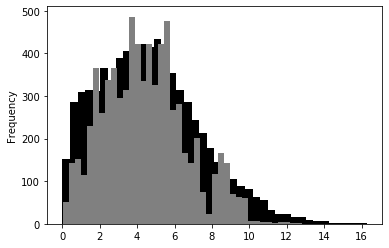

In [104]:
display(results.gasto_aceite_Mbd.describe(),
        results.gasto_aceite_Mbd.quantile([.1,.5,.9]),
        results.Hyperbolic_Predicted.describe(),
        results.Hyperbolic_Predicted.quantile([.1,.5,.9]))
results.gasto_aceite_Mbd.plot.hist(bins=40,color='black'),
results.Hyperbolic_Predicted.plot.hist(bins=40,color='gray')

count    7328.000000
mean        3.662449
std         5.254861
min         0.000413
25%         1.239010
50%         2.116109
75%         3.523018
max        64.574833
Name: gasto_gas_MMpcd, dtype: float64

0.1    0.653218
0.5    2.116109
0.9    7.483920
Name: gasto_gas_MMpcd, dtype: float64

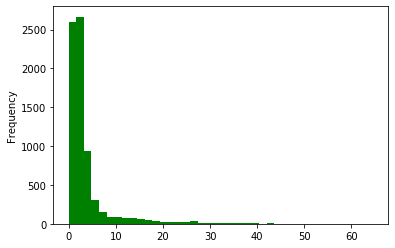

In [105]:
display(results.gasto_gas_MMpcd.describe(),
       results.gasto_gas_MMpcd.quantile([.1,.5,.9]))
results.gasto_gas_MMpcd.plot.hist(bins=40,color='green')

array([0.88819998, 0.55957469, 0.66832947, ..., 0.99997463, 0.98888252,
       0.98888839])

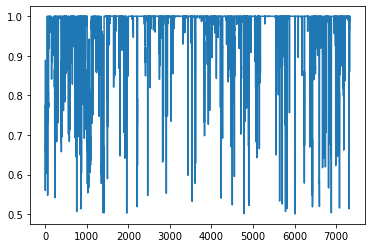

In [106]:
cdf=stats.norm.cdf(results.gasto_aceite_Mbd)

display(cdf)

plt.plot(cdf)

In [109]:
scipy.info(stats)

Statistical functions (:mod:`scipy.stats`)

.. currentmodule:: scipy.stats

This module contains a large number of probability distributions as
well as a growing library of statistical functions.

Each univariate distribution is an instance of a subclass of `rv_continuous`
(`rv_discrete` for discrete distributions):

.. autosummary::
   :toctree: generated/

   rv_continuous
   rv_discrete
   rv_histogram

Continuous distributions

.. autosummary::
   :toctree: generated/

   alpha             -- Alpha
   anglit            -- Anglit
   arcsine           -- Arcsine
   argus             -- Argus
   beta              -- Beta
   betaprime         -- Beta Prime
   bradford          -- Bradford
   burr              -- Burr (Type III)
   burr12            -- Burr (Type XII)
   cauchy            -- Cauchy
   chi               -- Chi
   chi2              -- Chi-squared
   cosine            -- Cosine
   crystalball       -- Crystalball
   dgamma            -- Double Gamma
   dweibull          --

## Distribution fitting

In [262]:
class Distribution(object):
    
    def __init__(self,dist_names_list = []):
        self.dist_names = ['beta',
                            'expon',
                            'gamma',
                            'lognorm',
                            'norm',
                            'pearson3',
                            'triang',
                            'uniform',
                            'weibull_min', 
                            'weibull_max']
        self.dist_results = []
        self.params = {}
        
        self.DistributionName = ""
        self.PValue = 0
        self.Param = None
        
        self.isFitted = False
        
        
    def Fit(self, y):
        self.dist_results = []
        self.params = {}
        for dist_name in self.dist_names:
            dist = getattr(scipy.stats, dist_name)
            param = dist.fit(y)
            
            self.params[dist_name] = param
            #Applying the Kolmogorov-Smirnov test
            D, p = scipy.stats.kstest(y, dist_name, args=param);
            self.dist_results.append((dist_name,p))
        #select the best fitted distribution
        sel_dist,p = (max(self.dist_results,key=lambda item:item[1]))
        #store the name of the best fit and its p value
        self.DistributionName = sel_dist
        self.PValue = p
        
        self.isFitted = True
        return self.DistributionName,self.PValue
    
    def Random(self, n = 1):
        if self.isFitted:
            dist_name = self.DistributionName
            param = self.params[dist_name]
            #initiate the scipy distribution
            dist = getattr(scipy.stats, dist_name)
            return dist.rvs(*param[:-2], loc=param[-2], scale=param[-1], size=n)
        else:
            raise ValueError('Must first run the Fit method.')
            
    def Plot(self,y):
        x = self.Random(n=len(y))
        plt.hist(x, alpha=0.5, label='Fitted',bins=50)
        plt.hist(y, alpha=0.5, label='Actual',bins=50)
        plt.legend(loc='upper right')

('weibull_min', 3.058129500459638e-05)

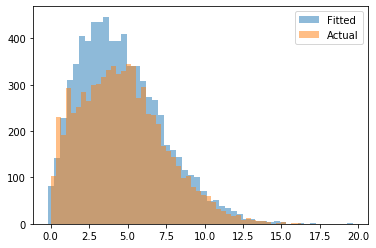

In [264]:
dst=Distribution()
display(dst.Fit(df.gasto_aceite_Mbd))
dst.Plot(df.gasto_aceite_Mbd)

## Distribution fitting - Method 2

In [245]:
df=pd.read_csv(r'/Users/fffte/ainda_drive/python/csv/benchmark/kumaza_dca.csv',index_col='days_online')
df=df.drop(columns='Unnamed: 0')

In [246]:
input_pozo = input("Nombre de pozo: ")

Nombre de pozo: ZAAP-33


In [247]:
selected_rows=df.pozo.str.contains(str(input_pozo))
pozo=df.loc[selected_rows]

In [248]:
y=pd.DataFrame(pozo.gasto_aceite_Mbd)

,gasto_aceite_Mbd
count,36.000000
mean,6.785615
std,2.217443
min,2.175978
25%,5.041891
50%,6.713864
75%,8.663424
max,10.432089


,gasto_aceite_Mbd
days_online,
0,9.799286
29,10.051483
60,10.105339
90,10.432089
121,10.269549


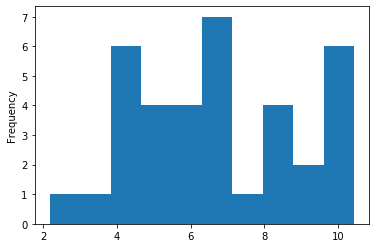

In [250]:
y.gasto_aceite_Mbd.plot.hist(bins=10)
display(y.describe(),
        y.head())

,gasto_aceite_Mbd
days_online,
0,1.217011
29,0.149891
60,0.435305
90,0.443587
121,0.449856


array([-1.26586895, -1.65779286, -1.55296813, ..., -0.22458473,
       -0.87313741, -0.87306359])

(array([1060., 1401., 1642., 1488.,  920.,  477.,  231.,   78.,   25.,
           6.]),
 array([-1.71235598, -1.11479189, -0.51722781,  0.08033627,  0.67790036,
         1.27546444,  1.87302852,  2.47059261,  3.06815669,  3.66572077,
         4.26328486]),
 <a list of 10 Patch objects>)

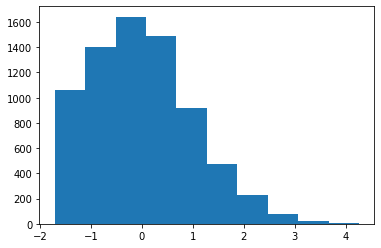

In [208]:
sc=StandardScaler() 
yy = np.reshape(y,(-1,1))
sc.fit(yy)
y_std =sc.transform(y)
y_std = y_std.flatten()
y_std

display(yy.head(),y_std)
plt.hist(y_std)

In [209]:
# Set list of distributions to test
# See https://docs.scipy.org/doc/scipy/reference/stats.html for more

# Turn off code warnings (this is not recommended for routine use)
import warnings
warnings.filterwarnings("ignore")

# Set up list of candidate distributions to use
# See https://docs.scipy.org/doc/scipy/reference/stats.html for more

dist_names = ['beta',
              'expon',
              'gamma',
              'lognorm',
              'norm',
              'pearson3',
              'triang',
              'uniform',
              'weibull_min', 
              'weibull_max']

# Set up empty lists to stroe results
chi_square = []
p_values = []

# Set up 50 bins for chi-square test
# Observed data will be approximately evenly distrubuted aross all bins
percentile_bins = np.linspace(0,100,51)
percentile_cutoffs = np.percentile(y_std, percentile_bins)
observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

# Loop through candidate distributions

for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)
    
    # Obtain the KS test P statistic, round it to 5 decimal places
    p = scipy.stats.kstest(y_std, distribution, args=param)[1]
    p = np.around(p, 5)
    p_values.append(p)   
    
        
    # Get expected counts in percentile bins
    # This is based on a 'cumulative distrubution function' (cdf)
    cdf_fitted = dist.cdf(percentile_cutoffs, *param[:-2], loc=param[-2], 
                          scale=param[-1])
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)

In [210]:
display(p_values)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

## Codigo original

In [217]:
# Set list of distributions to test
# See https://docs.scipy.org/doc/scipy/reference/stats.html for more

# Turn off code warnings (this is not recommended for routine use)
import warnings
warnings.filterwarnings("ignore")

# Set up list of candidate distributions to use
# See https://docs.scipy.org/doc/scipy/reference/stats.html for more

dist_names = ['beta',
              'expon',
              'gamma',
              'lognorm',
              'norm',
              'pearson3',
              'triang',
              'uniform',
              'weibull_min', 
              'weibull_max']

# Set up empty lists to stroe results
chi_square = []
p_values = []

# Set up 50 bins for chi-square test
# Observed data will be approximately evenly distrubuted aross all bins
percentile_bins = np.linspace(0,100,51)
percentile_cutoffs = np.percentile(y_std, percentile_bins)
observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
cum_observed_frequency = np.cumsum(observed_frequency)

# Loop through candidate distributions

for distribution in dist_names:
    # Set up distribution and get fitted distribution parameters
    dist = getattr(scipy.stats, distribution)
    param = dist.fit(y_std)
    
    # Obtain the KS test P statistic, round it to 5 decimal places
    p = scipy.stats.kstest(y_std, distribution, args=param)[1]
    p = np.around(p, 5)
    p_values.append(p)    
    
    # Get expected counts in percentile bins
    # This is based on a 'cumulative distrubution function' (cdf)
    cdf_fitted = dist.cdf(percentile_cutoffs, *param[:-2], loc=param[-2], 
                          scale=param[-1])
    expected_frequency = []
    for bin in range(len(percentile_bins)-1):
        expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
        expected_frequency.append(expected_cdf_area)
    
    # calculate chi-squared
    expected_frequency = np.array(expected_frequency) * size
    cum_expected_frequency = np.cumsum(expected_frequency)
    ss = sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency)
    chi_square.append(ss)
        
# Collate results and sort by goodness of fit (best at top)

results = pd.DataFrame()
results['Distribution'] = dist_names
results['chi_square'] = chi_square
results['p_value'] = p_values
results.sort_values(['chi_square'], inplace=True)
    
# Report results

print ('\nDistributions sorted by goodness of fit:')
print ('----------------------------------------')
print (results)

NameError: name 'size' is not defined